In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
print('Hello! I want to draw functions of CTEQ6')

Hello! I want to draw functions of CTEQ6


The coefficients for the nonperturbative PDF is at Q_0 = 1.3GeV


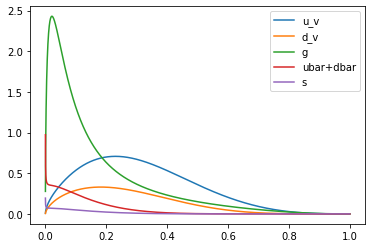

In [2]:
#number from paper
def CTEQ6_PDF(parameters):
    x_axis = np.arange(0.0001,0.9999,0.0001)
    return parameters[0]*x_axis**parameters[1]*(1-x)**parameters[2]\
    *np.exp(parameters[3]*x_axis)*(1+np.exp(parameters[4])*x)**parameters[5]
parameters_u_v = [1.7199,0.5526,2.9009,-2.3402,1.6123,1.5917]
x = np.arange(0.0001,0.9999,0.0001)
print('The coefficients for the nonperturbative PDF is at Q_0 = 1.3GeV')
y_u_v = CTEQ6_PDF(parameters_u_v)
plt.plot(x,y_u_v,label="u_v")
parameters_d_v = [1.4473,0.6160,4.9670,-0.8408,0.4031,3]
y_d_v = CTEQ6_PDF(parameters_d_v)
plt.plot(x,y_d_v,label="d_v")
parameters_g = [30.4571,0.51,2.3823,4.3945,2.355,-3]
y_g = CTEQ6_PDF(parameters_g)
plt.plot(x,y_g,label="g")
parameters_ubardbar = [0.0616,-0.299,7.717,-0.5283,4.7539,0.6137]
y_dbarplusubar = CTEQ6_PDF(parameters_ubardbar)
plt.plot(x,y_dbarplusubar,label="ubar+dbar")
parameters_s = [0.0123,-0.299,7.717,-0.5283,4.7539,0.6137]
y_s = CTEQ6_PDF(parameters_s)
plt.plot(x,y_s,label='s')
plt.legend()

In [3]:
#import scipy.integrate as integrate
#print(integrate.quad(CSVx_param,0,1,m_Q2.values))
#print(integrate.quad(CTEQ6_PDF,1,parameters_u_v))

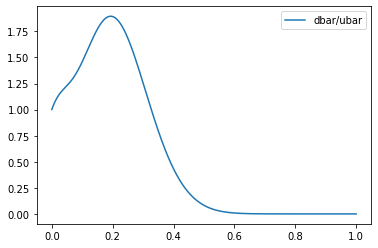

In [4]:
def CTEQ6_dbar_over_ubar(parameters):
    x_axis = np.arange(0.0001,0.9999,0.0001)
    return parameters[0]*x_axis**parameters[1]*(1-x_axis)**parameters[2]+(1+parameters[3]*x)*(1-x_axis)**parameters[4]
parameters_ratio = [33657.8,4.2767,14.8586,17,8.6408]
y_dbaroverubar = CTEQ6_dbar_over_ubar(parameters_ratio)
plt.plot(x,y_dbaroverubar,label='dbar/ubar')
plt.legend()

In [5]:
A = np.asarray(y_dbarplusubar)
B = np.asarray(y_dbaroverubar)

y_ubar = A/(1+B)
y_dbar = y_ubar*B

The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV


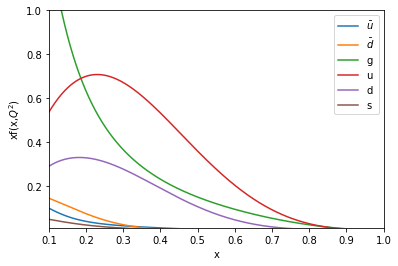

In [6]:
print('The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV')
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x,y_ubar,label=r"$\bar u$")
plt.plot(x,y_dbar,label=r"$\bar d$")
plt.plot(x,y_g,label="g")
plt.plot(x,y_u_v,label="u")
plt.plot(x,y_d_v,label="d")
plt.plot(x,y_s,label="s")
#ax.set_yscale("log")
#ax.set_xscale("log")
plt.ylim(1e-2,1e0)
plt.xlim(1e-1,1e0)
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
plt.legend()
plt.savefig('cteqPDFs.png')

In [7]:
print('The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV log(Q^2)PDGctex subroutine')
print("  A_0  A_1 A_2 A_3 A_4 A_5")
print("d_v      ",parameters_d_v)
print("u_v      ",parameters_u_v)
print("g        ",parameters_g)
print("ubar_dbar", parameters_ubardbar)
print("s        ", parameters_s)
print("dbar/ubar",parameters_ratio)

The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV log(Q^2)PDGctex subroutine
  A_0  A_1 A_2 A_3 A_4 A_5
d_v       [1.4473, 0.616, 4.967, -0.8408, 0.4031, 3]
u_v       [1.7199, 0.5526, 2.9009, -2.3402, 1.6123, 1.5917]
g         [30.4571, 0.51, 2.3823, 4.3945, 2.355, -3]
ubar_dbar [0.0616, -0.299, 7.717, -0.5283, 4.7539, 0.6137]
s         [0.0123, -0.299, 7.717, -0.5283, 4.7539, 0.6137]
dbar/ubar [33657.8, 4.2767, 14.8586, 17, 8.6408]


LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
Q2 is  4
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
Q2 is  4.75
Q2 is  5.5


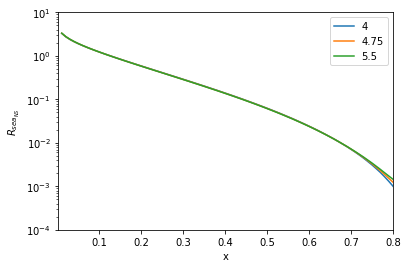

In [8]:
import lhapdf
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
Q2s = [4,4.75,5.5]
for i in range(len(Q2s)):
    Q2 = Q2s[i]
    Q=math.sqrt(Q2)
    print("Q2 is ",Q2)
    x_axis = np.arange(0.01,0.99,0.01)
    y_dv=[]
    y_uv=[]
    y_dbar=[]
    y_ubar=[]
    for x in np.arange(0.01,0.99,0.01):
        y_dv.append(p_cteq6.xfxQ(1,x,Q))
        y_uv.append(p_cteq6.xfxQ(2,x,Q))
        y_dbar.append(p_cteq6.xfxQ(-1,x,Q))
        y_ubar.append(p_cteq6.xfxQ(-2,x,Q))
    u_bar=np.asarray(y_ubar)
    d_bar=np.asarray(y_dbar)
    u_v=np.asarray(y_uv)
    d_v=np.asarray(y_dv)
    R_sea_NS=5*(u_bar+d_bar)/(u_v+d_v)
    Bxz=R_sea_NS
    #fig = plt.figure()
    #ax = fig.add_subplot()
    plt.plot(x_axis,Bxz,label=Q2)
    plt.yscale('log')
    #ax.set_yscale("log")
    plt.ylim(1e-4,1e1)
    plt.xlim(0.001,0.8)
    plt.xlabel("x")
    plt.ylabel(r"$R_{sea_{NS}}$")
    plt.legend()

Q2 is  4
Q2 is  4.75
Q2 is  5.5


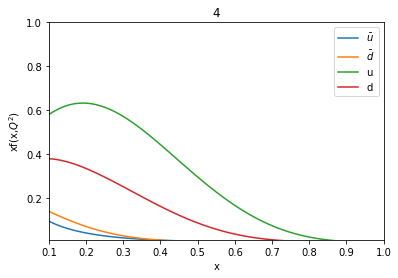

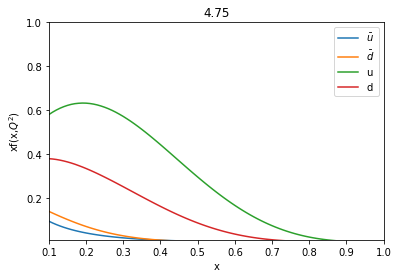

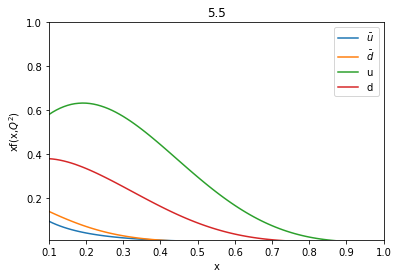

In [9]:
for i in range(len(Q2s)):
    Q2 = Q2s[i]
    Q=math.sqrt(Q2)
    print("Q2 is ",Q2)
    fig = plt.figure()
    ax = fig.add_subplot()
    plt.plot(x_axis,y_ubar,label=r"$\bar u$")
    plt.plot(x_axis,y_dbar,label=r"$\bar d$")
    #plt.plot(x_axis,y_g,label="g")
    plt.plot(x_axis,y_uv,label="u")
    plt.plot(x_axis,y_dv,label="d")
    #plt.plot(x_axis,y_s,label="s")
    #ax.set_yscale("log")
    #ax.set_xscale("log")
    plt.ylim(1e-2,1e0)
    plt.xlim(1e-1,1e0)
    plt.xlabel("x")
    plt.ylabel(r"xf(x,$Q^2$)")
    ax.set_title(Q2)
    plt.legend()

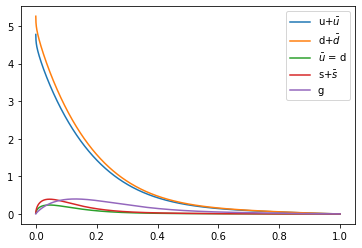

In [10]:
def Frag_D(parameters):
    z = np.arange(0.0001,0.9999,0.0001)
    return parameters[0]*z**parameters[1]*(1-z)**parameters[2]*(1+parameters[3]*(1-z)**parameters[4])
parameters_uPlusubar = [0.345,-0.015,1.2,11.06,4.23]
z_axis = np.arange(0.0001,0.9999,0.0001)
D_uPlusubar = Frag_D(parameters_uPlusubar)
plt.plot(z_axis,D_uPlusubar,label=r'u+$\bar u$')
parameters_dPlusdbar = [0.380,-0.015,1.2,11.06,4.23]
D_dPlusdbar = Frag_D(parameters_dPlusdbar)
plt.plot(z_axis,D_dPlusdbar,label=r'd+$\bar d$')
parameters_ubarEqvd = [0.115,0.520,3.27,16.26,8.46]
D_ubarEqvd = Frag_D(parameters_ubarEqvd)
plt.plot(z_axis,D_ubarEqvd,label=r'$\bar u$ = d')
parameters_sPlussbar = [0.190,0.520,3.27,16.26,8.46]
D_sPlussbar = Frag_D(parameters_sPlussbar)
plt.plot(z_axis,D_sPlussbar,label=r's+$\bar s$')
#parameters_cPluscbar = [0.271,-0.905,3.23,0,0]
#D_cPluscbar = Frag_D(parameters_cPluscbar)
#plt.plot(z_axis,D_cPluscbar,label=r'c+$\bar c$')
#parameters_bPlusbbar = [0.501,-1.305,5.67,0,0]
#D_bPlusbbar = Frag_D(parameters_bPlusbbar)
#plt.plot(z_axis,D_bPlusbbar,label=r'b+$\bar b$')
parameters_g = [0.279,0.899,1.57,20,4.91]
D_g = Frag_D(parameters_g)
plt.plot(z_axis,D_g,label='g')
plt.legend()

This is CSV function delta u_v / delta d_v
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042


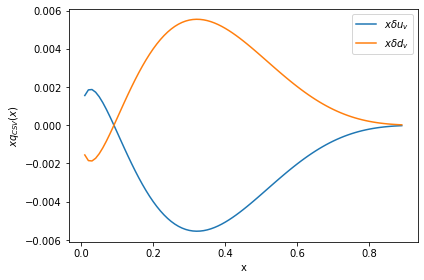

In [11]:
#use lhapdf 
import lhapdf
print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.01,0.9,0.01)
    return x*parameter*(1-x)**4*x**-0.5*(x-0.0909)
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
def Ax(xbj,Q):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))


x_axis = np.arange(0.01,0.9,0.01)
y_delta_uv = delta_udv(-0.2)
plt.plot(x_axis,y_delta_uv,label=r'$x\delta u_v$')
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv,label=r'$x\delta d_v$')

plt.xlabel("x")
plt.ylabel(r'$xq_{CSV}(x)$')
plt.legend()
plt.tight_layout()
plt.savefig('notebook_results/MRST_XqCSV.pdf')

Text(0, 0.5, '$x(\\delta d - \\delta u)$')

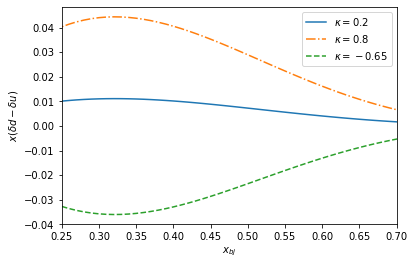

In [12]:
plt.plot(x_axis,y_delta_dv-y_delta_uv,label = r'$\kappa=0.2$')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.',label = r'$\kappa=0.8$')
plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--',label = r'$\kappa=-0.65$')
plt.legend()
plt.xlim(0.25,0.7)
#plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$x(\delta d - \delta u)$")

Text(0, 0.5, '$A(x)*CSV$')

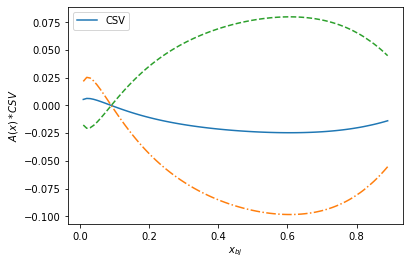

In [13]:
Ax_1 = []
for i in x_axis:
    Ax_1.append(Ax(i,2))
#plt.plot(x_axis,Ax_1)
plt.plot(x_axis,Ax_1*(y_delta_dv-y_delta_uv),label = 'CSV')
plt.plot(x_axis,Ax_1*(y_delta_uv_up-y_delta_uv_low),'-.')
plt.plot(x_axis,Ax_1*(y_delta_dv_up-y_delta_dv_low),'--')
plt.legend()
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$A(x)*CSV$")


In [14]:
import sys
sys.path.insert(1,'DSS')
import fDSS_

In [15]:
fDSS_.fdss(1,-1,0,0.5,5)

array([ 8.59332595e-02,  2.29340147e-01,  2.56035561e-01,  8.58832595e-02,
        7.58130754e-02,  7.58130754e-02,  6.17155984e-02, -8.42293556e-19,
        5.26047325e-01])

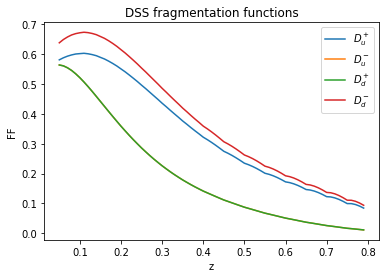

In [16]:
zs = np.arange(0.05,0.8,0.01)
Duplus = []
Duminus = []
Ddplus = []
Ddminus = []
for zi in zs:
    Duplus.append(fDSS_.fdss(1,1,0,zi,4.0)[0])
    Duminus.append(fDSS_.fdss(1,-1,0,zi,4.0)[0])
    Ddplus.append(fDSS_.fdss(1,1,0,zi,4.0)[2])
    Ddminus.append(fDSS_.fdss(1,-1,0,zi,4.0)[2])
plt.plot(zs,Duplus,label = r'$D_u^+$') 
plt.plot(zs,Duminus,label = r'$D_u^-$')
plt.plot(zs,Ddplus,label = r'$D_d^+$')
plt.plot(zs,Ddminus,label = r'$D_d^-$')
plt.legend()
plt.title('DSS fragmentation functions')
plt.xlabel('z')
plt.ylabel('FF')
plt.savefig('notebook_results/DSS_FFs.pdf')

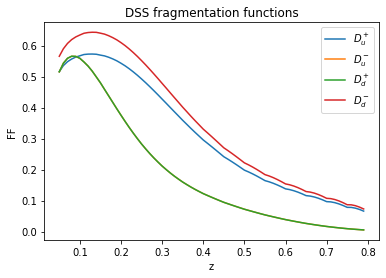

In [17]:
zs = np.arange(0.05,0.8,0.01)
Duplus = []
Duminus = []
Ddplus = []
Ddminus = []
for zi in zs:
    Duplus.append(fDSS_.fdss(1,1,1,zi,4.0)[0])
    Duminus.append(fDSS_.fdss(1,-1,1,zi,4.0)[0])
    Ddplus.append(fDSS_.fdss(1,1,1,zi,4.0)[2])
    Ddminus.append(fDSS_.fdss(1,-1,1,zi,4.0)[2])
plt.plot(zs,Duplus,label = r'$D_u^+$') 
plt.plot(zs,Duminus,label = r'$D_u^-$')
plt.plot(zs,Ddplus,label = r'$D_d^+$')
plt.plot(zs,Ddminus,label = r'$D_d^-$')
plt.legend()
plt.title('DSS fragmentation functions')
plt.xlabel('z')
plt.ylabel('FF')
plt.savefig('notebook_results/DSS_FFs_NLO.pdf')

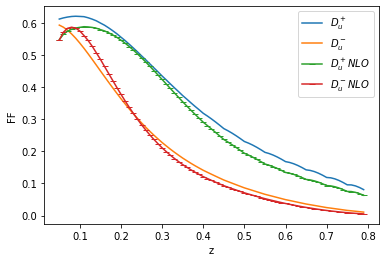

In [18]:
Duplus = []
Duminus = []
Duplus_nlo = []
Duminus_nlo = []
DSS_LO = []
DSS_NLO = []
for zi in zs:
    Duplus.append(fDSS_.fdss(1,1,0,zi,4.75)[0])
    Duminus.append(fDSS_.fdss(1,-1,0,zi,4.75)[0])
    Duplus_nlo.append(fDSS_.fdss(1,1,1,zi,4.75)[0])
    Duminus_nlo.append(fDSS_.fdss(1,-1,1,zi,4.75)[0])
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,4.75)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,4.75)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])


plt.plot(zs,Duplus,label = r'$D_u^+$') 
plt.plot(zs,Duminus,label = r'$D_u^-$')
plt.plot(zs,Duplus_nlo,label = r'$D_u^+ NLO$',marker = "_")
plt.plot(zs,Duminus_nlo,label = r'$D_u^- NLO$',marker = "_")
plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

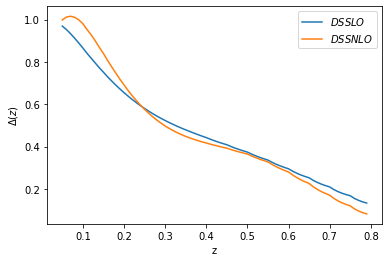

In [19]:
plt.plot(zs,DSS_LO,label = r'$DSS LO$')
plt.plot(zs,DSS_NLO,label = r'$DSS NLO$')
plt.xlabel('z')
plt.ylabel(r'$\Delta(z)$')
plt.legend()

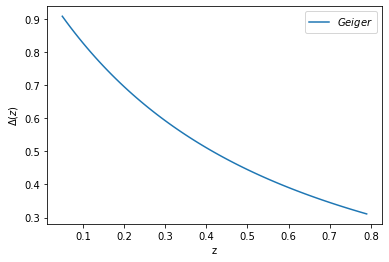

In [20]:
Geiger_Delta = []
for z_had in zs:
    Geiger_Delta.append((1.0-z_had)**0.0083583/(1.0+z_had)**1.9838)
plt.plot(zs,Geiger_Delta,label = r'$Geiger$')
plt.xlabel('z')
plt.ylabel(r'$\Delta(z)$')
plt.legend()

In [21]:
JAM21 = lhapdf.mkPDF("JAM21PionPDFnlo", 0)
#set_JAM21 = lhapdf.getPDFSet("JAM21PionPDFnlo")
#JAM21 = set_JAM21.mkPDFs()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM21PionPDFnlo/JAM21PionPDFnlo_0000.dat
JAM21PionPDFnlo PDF set, member #0, version 1


In [22]:
print(JAM21.xfxQ(2,0.24,2))##what does it mean??

0.05782535210760307


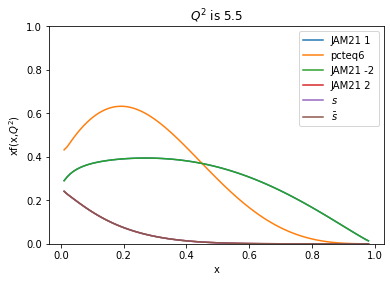

In [23]:
x_axis = np.arange(0.01,0.99,0.01)
y_dv=[]
y_uv=[]
y_dbar=[]
y_ubar=[]
y_g = []
y_s = []
y_sbar = []
for x in np.arange(0.01,0.99,0.01):
    y_dv.append(JAM21.xfxQ(1,x,Q))
    y_uv.append(p_cteq6.xfxQ(2,x,Q))
    #y_dbar.append(JAM21.xfxQ(-1,x,Q))
    y_dbar.append(JAM21.xfxQ(-2,x,Q))
    #y_dbar.append(JAM21.xfxQ(-1,x,Q))
    y_ubar.append(JAM21.xfxQ(2,x,Q))
    y_g.append(JAM21.xfxQ(0,x,Q))
    y_s.append(JAM21.xfxQ(3,x,Q))
    y_sbar.append(JAM21.xfxQ(-3,x,Q))
    
#y_uv[0] = 0    
plt.plot(x_axis,y_dv,label=r"JAM21 1")
plt.plot(x_axis,y_uv,label=r"pcteq6")
#plt.plot(x_axis,y_1,label=r"$g$")
plt.plot(x_axis,y_dbar,label=r"JAM21 -2")
plt.plot(x_axis,y_ubar,label=r"JAM21 2")
plt.plot(x_axis,y_s,label = r"$s$")
plt.plot(x_axis,y_sbar,label = r"$\bar s$")
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str = str(Q*Q)
plt.title(r"$Q^2$ is "+Q2_str[0:5])
plt.legend()
plt.ylim(0,1)
plt.xlabel('x')

plt.legend()

In [24]:
cd hkns07fflib-v1_2/

/Users/shuojia/CSV/notebook/hkns07fflib-v1_2


In [25]:
import hknsff07_


In [26]:
print(hknsff07_.hknsff.__doc__)
ff = np.zeros(11)
grad = np.zeros((11,17))
hknsff07_.hknsff(10.00000000,0.5,1,1,ff,grad)
print(ff)
print(ff[1])

hknsff(q2,x,iset,icharge,ff,grad)

Wrapper for ``hknsff``.

Parameters
----------
q2 : input float
x : input float
iset : input int
icharge : input int
ff : input rank-1 array('d') with bounds (11)
grad : input rank-2 array('d') with bounds (11,17)

[0.         0.1355092  0.09328614 0.622517   0.09328614 0.04273529
 0.622517   0.09328614 0.09328614 0.1355092  0.        ]
0.1355092


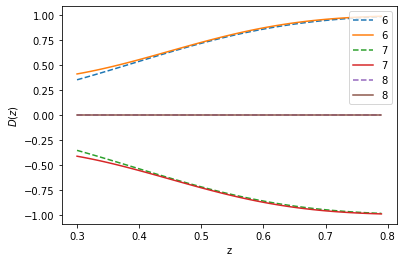

In [27]:
Q = 2
z_axis = np.arange(0.3,0.8,0.01)
for i_charge in [6,7,8]:
    HKNSFF07_LO = []
    HKNSFF07_NLO = []
    for zi in z_axis:
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
        duplus = ff[i_charge]
        duminus = ff_minus[i_charge]
        if duplus!=0:
            HKNSFF07_LO.append(duminus/duplus)
        else: HKNSFF07_LO.append(0)
        ff_NLO = np.zeros(11)
        grad_NLO = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
        ff_NLO_minus = np.zeros(11)
        grad_NLO_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
        duplus_NLO = ff_NLO[i_charge]
        duminus_NLO = ff_NLO_minus[i_charge]
        if duplus_NLO!=0:
            HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)
        else: HKNSFF07_NLO.append(0)
    plt.ylabel(r'$D(z)$')
    plt.xlabel('z')
    plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = i_charge)
    plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),label = i_charge)
    #plt.ylim(0,1)
    plt.legend()


LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat


JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/NNFF10_PIm_lo/NNFF10_PIm_lo_0000.dat
NNFF10_PIm_lo PDF set, member #0, version 1; LHAPDF ID = 2000000
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/NNFF10_PIp_lo/NNFF10_PIp_lo_0000.dat
NNFF10_PIp_lo PDF set, member #0, version 1; LHAPDF ID = 2000200
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/MAPFF10NLOPIm/MAPFF10NLOPIm_0000.dat
MAPFF10NLOPIm PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/MAPFF10NLOPIp/MAPFF10NLOPIp_0000.dat
MAPFF10NLOPIp PDF set, member #0, version 2


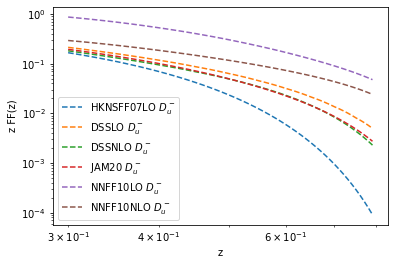

In [28]:
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
NNFF10_PIm_lo = lhapdf.mkPDF("NNFF10_PIm_lo",0)
NNFF10_PIp_lo = lhapdf.mkPDF("NNFF10_PIp_lo",0)
NNFF10_PIm_nlo = lhapdf.mkPDF("MAPFF10NLOPIm",0)
NNFF10_PIp_nlo = lhapdf.mkPDF("MAPFF10NLOPIp",0)
Q = 10
z_axis = np.arange(0.3,0.8,0.01)
for i_charge in [6]:
    HKNSFF07_LO = []
    HKNSFF07_NLO = []
    
    for zi in z_axis:
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,2,2,ff_minus,grad_minus)
        duplus = ff[i_charge]
        duminus = ff_minus[i_charge]
        HKNSFF07_LO.append(zi*duminus)
        
    #plt.ylabel(r'$D(z)$')
    plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle = 'dashed',label = r'HKNSFF07LO $D_u^-$')
DSS_U = []
DSS_NLO_U = []
JAM_U = []
NNFF10_lo_U = []
NNFF10_nlo_U = []
for zi in z_axis:
    DSS_U.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0])
    DSS_NLO_U.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0])
    JAM_U.append(JAM20.xfxQ(-2,zi,Q))
    NNFF10_lo_U.append(NNFF10_PIm_lo.xfxQ(-2,zi,Q))
    NNFF10_nlo_U.append(NNFF10_PIm_nlo.xfxQ(-2,zi,Q))
plt.plot(z_axis,np.asarray(DSS_U),linestyle = 'dashed',label = r'DSSLO $D_u^-$')
plt.plot(z_axis,np.asarray(DSS_NLO_U),linestyle = 'dashed',label = r'DSSNLO $D_u^-$')
plt.plot(z_axis,np.asarray(JAM_U),linestyle = 'dashed',label = r'JAM20 $D_u^-$')
plt.plot(z_axis,np.asarray(NNFF10_lo_U),linestyle = 'dashed',label = r'NNFF10LO $D_u^-$')
plt.plot(z_axis,np.asarray(NNFF10_nlo_U),linestyle = 'dashed',label = r'NNFF10NLO $D_u^-$')




plt.xlabel('z')
plt.ylabel('z FF(z)')
plt.yscale('log')
plt.xscale('log')
        #plt.ylim(0,1)
plt.legend()



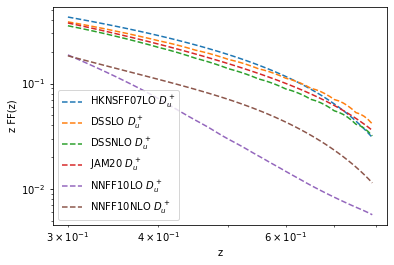

In [29]:
Q = 10
z_axis = np.arange(0.3,0.8,0.01)
for i_charge in [6]:
    HKNSFF07_LO = []
    HKNSFF07_NLO = []
    
    for zi in z_axis:
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,zi,2,2,ff_minus,grad_minus)
        duplus = ff[i_charge]
        duminus = ff_minus[i_charge]
        HKNSFF07_LO.append(zi*duplus)
        
    #plt.ylabel(r'$D(z)$')
    plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle = 'dashed',label = r'HKNSFF07LO $D_u^+$')
DSS_U = []
DSS_NLO_U = []
JAM_U = []
NNFF10_lo_U = []
NNFF10_nlo_U = []
for zi in z_axis:
    DSS_U.append(fDSS_.fdss(1,1,0,zi,Q*Q)[0])
    DSS_NLO_U.append(fDSS_.fdss(1,1,1,zi,Q*Q)[0])
    JAM_U.append(JAM20.xfxQ(2,zi,Q))
    NNFF10_lo_U.append(NNFF10_PIm_lo.xfxQ(2,zi,Q))
    NNFF10_nlo_U.append(NNFF10_PIm_nlo.xfxQ(2,zi,Q))
plt.plot(z_axis,np.asarray(DSS_U),linestyle = 'dashed',label = r'DSSLO $D_u^+$')
plt.plot(z_axis,np.asarray(DSS_NLO_U),linestyle = 'dashed',label = r'DSSNLO $D_u^+$')
plt.plot(z_axis,np.asarray(JAM_U),linestyle = 'dashed',label = r'JAM20 $D_u^+$')
plt.plot(z_axis,np.asarray(NNFF10_lo_U),linestyle = 'dashed',label = r'NNFF10LO $D_u^+$')
plt.plot(z_axis,np.asarray(NNFF10_nlo_U),linestyle = 'dashed',label = r'NNFF10NLO $D_u^+$')



plt.xlabel('z')
plt.ylabel('z FF(z)')
plt.yscale('log')
plt.xscale('log')
        #plt.ylim(0,1)
plt.legend()




Text(0.5, 1.0, 'JAM20 fragmentation functions')

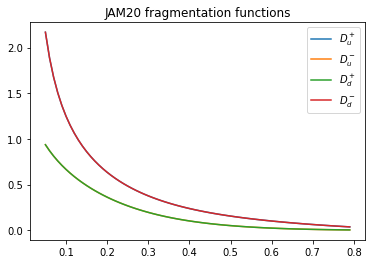

In [30]:
zs = np.arange(0.05,0.8,0.01)
Duplus = []
Duminus = []
Ddplus = []
Ddminus = []
for zi in zs:
    Duminus.append(JAM20.xfxQ(-2,zi,Q))#Du-
    Duplus.append(JAM20.xfxQ(2,zi,Q))#Du+
    Ddplus.append(JAM20.xfxQ(1,zi,Q))#Ddplus
    Ddminus.append(JAM20.xfxQ(-1,zi,Q))
plt.plot(zs,Duplus,label = r'$D_u^+$') 
plt.plot(zs,Duminus,label = r'$D_u^-$')
plt.plot(zs,Ddplus,label = r'$D_d^+$')
plt.plot(zs,Ddminus,label = r'$D_d^-$')
plt.legend()
plt.title('JAM20 fragmentation functions')
#plt.savefig('notebook_results/JAM20_FFs.pdf')

In [31]:
#subprocess.run(["./hknsff07_main.x"])

In [32]:
import numpy as np
import sys
sys.path.insert(1,'/Users/shuojia/CSV/notebook/hkns07fflib-v1_2')

#sys.path.insert(1,'hkns07fflib-v1_2')
#import hknsff07_2
#print(hknsff07_2.hknsff.__doc__)

ff = np.zeros(11)
grad = np.zeros((11,17))
#print(hknsff07.hknsff(10.0,0.5,1,1,ff,grad))
#hknsff07.hknsff(10,0.5,1,1,ff,grad)

#print(hknsff07_2.hknsff(10.0,0.5,1,1))
#ff,grad = hknsff07_2.hknsff(9,0.5,1,1)



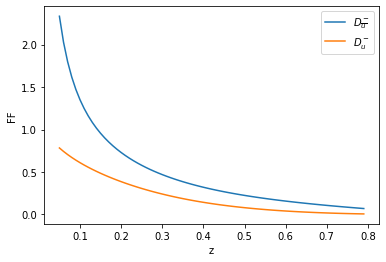

In [33]:

JAM20_Dum = []
JAM20_Dup = []
JAM20_Deltaz = []
for zi in zs:
    dup = JAM20.xfxQ(2,zi,2)
    dum = JAM20.xfxQ(-2,zi,2)
    #print(dup,' ',dum)
    JAM20_Dum.append(dum)
    JAM20_Dup.append(dup)
    JAM20_Deltaz.append(dum/dup)
plt.plot(zs,JAM20_Dup,label = r'$D^-_{\overline{u}}$')
plt.plot(zs,JAM20_Dum,label = r'$D^-_u$')

plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

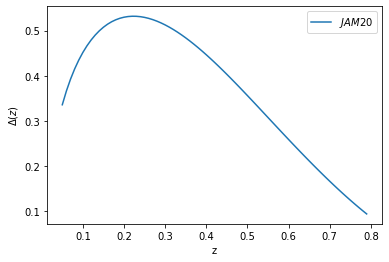

In [34]:
plt.plot(zs,JAM20_Deltaz,label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.legend()

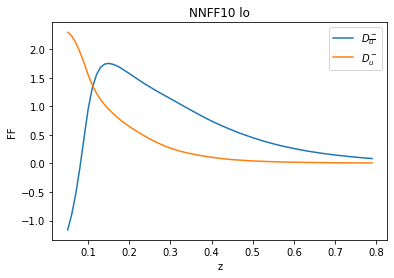

In [35]:

NNFF10lo_Dum = []
NNFF10lo_Dup = []
NNFF10lo_Deltaz = []
for zi in zs:
    dup = NNFF10_PIp_lo.xfxQ(2,zi,2)
    dum = NNFF10_PIm_lo.xfxQ(2,zi,2)
    #print(dup,' ',dum)
    NNFF10lo_Dum.append(dum)
    NNFF10lo_Dup.append(dup)
    NNFF10lo_Deltaz.append(dum/dup)
plt.plot(zs,NNFF10lo_Dup,label = r'$D^-_{\overline{u}}$')
plt.plot(zs,NNFF10lo_Dum,label = r'$D^-_u$')
plt.title('NNFF10 lo')
plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

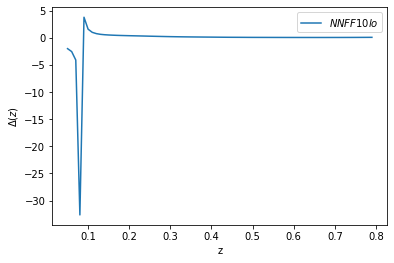

In [36]:
plt.plot(zs,NNFF10lo_Deltaz,label = r'$NNFF10lo$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.legend()

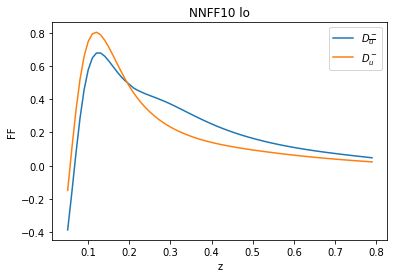

In [37]:

NNFF10nlo_Dum = []
NNFF10nlo_Dup = []
NNFF10nlo_Deltaz = []
for zi in zs:
    dup = NNFF10_PIp_nlo.xfxQ(2,zi,2)
    dum = NNFF10_PIm_nlo.xfxQ(2,zi,2)
    #print(dup,' ',dum)
    NNFF10nlo_Dum.append(dum)
    NNFF10nlo_Dup.append(dup)
    NNFF10nlo_Deltaz.append(dum/dup)
plt.plot(zs,NNFF10nlo_Dup,label = r'$D^-_{\overline{u}}$')
plt.plot(zs,NNFF10nlo_Dum,label = r'$D^-_u$')
plt.title('NNFF10 lo')
plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

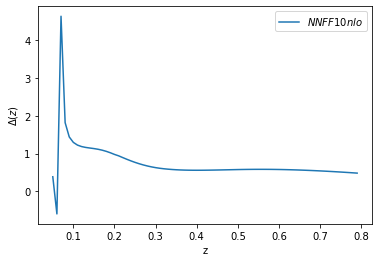

In [38]:
plt.plot(zs,NNFF10nlo_Deltaz,label = r'$NNFF10nlo$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.legend()

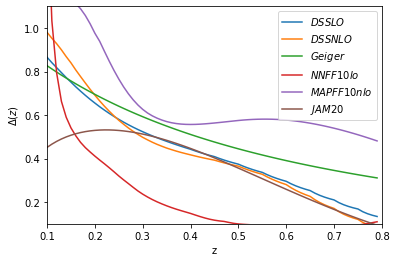

In [39]:
plt.plot(zs,DSS_LO,label = r'$DSS LO$')
plt.plot(zs,DSS_NLO,label = r'$DSS NLO$')
plt.plot(zs,Geiger_Delta,label = r'$Geiger$')
#plt.plot(zs,JAM21_NLO_1,label = r'$JAM21nlo$')
plt.plot(zs,NNFF10lo_Deltaz,label = r'$NNFF10lo$')
plt.plot(zs,NNFF10nlo_Deltaz,label = r'$MAPFF10nlo$')
plt.plot(zs,JAM20_Deltaz,label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.xlim(0.1,0.8)
plt.ylim(0.1,1.1)
plt.legend()
plt.savefig('/Users/shuojia/CSV/notebook/notebook_results/FFs.pdf')

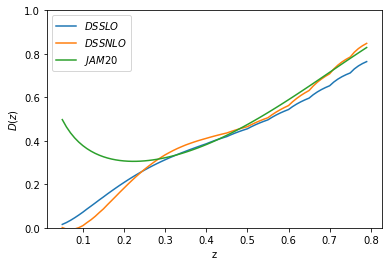

In [40]:
#DSS_LO
#DSS_NLO
#JAM20_Deltaz
plt.plot(zs,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),label = r'$DSS LO$')
plt.plot(zs,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),label = r'$DSS NLO$')
plt.plot(zs,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
#plt.xlim(0.1,0.9)
plt.ylim(0,1)
plt.legend()

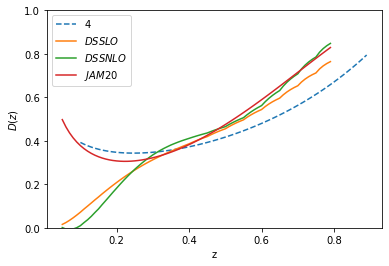

In [41]:
#parameter from my data, this needs to be updated everytime!
parameters = []
#4
parameters_0 = (0.31621375387783907,0.9655536623222454)
#parameters_0=(0.5837438039662431,-1.1844700435399933,1.6742194710533476)
#4.75
parameters_1=(0.5487693365000776,-1.0881946339773718,1.594995464377801)
#5.5
parameters_2=(0.38322380904636766,-0.47844410509432217,1.115729075281362)
def Dz(z_had, params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return (1-delta_z)/(1+delta_z)
z_had = np.arange(0.1,0.9,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz(z_had,parameters_0),linestyle='dashed',label = '4')
#plt.plot(z_had,Dz(z_had,parameters_1),linestyle='dashed',label = '4.75')
#plt.plot(z_had,Dz(z_had,parameters_2),linestyle='dashed',label = '5.5')
plt.plot(zs,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),label = r'$DSS LO$')
plt.plot(zs,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),label = r'$DSS NLO$')
plt.plot(zs,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
#plt.xlim(0.1,0.9)
plt.ylim(0,1)
plt.legend()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


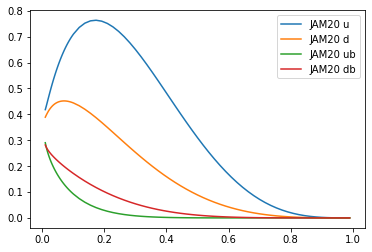

In [42]:
JAM20PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
Q = 2
x_axis=10**np.linspace(-2,-1)
x_axis=np.append(x_axis,np.linspace(0.101,0.99))
JAM20PDF_u = np.array([JAM20PDF.xfxQ(2,x,Q) for x in x_axis])
JAM20PDF_d = np.array([JAM20PDF.xfxQ(1,x,Q) for x in x_axis])
JAM20PDF_ub = np.array([JAM20PDF.xfxQ(-2,x,Q) for x in x_axis])
JAM20PDF_db = np.array([JAM20PDF.xfxQ(-1,x,Q) for x in x_axis])
plt.plot(x_axis,JAM20PDF_u,label = "JAM20 u")
plt.plot(x_axis,JAM20PDF_d,label = "JAM20 d")
plt.plot(x_axis,JAM20PDF_ub,label = "JAM20 ub")
plt.plot(x_axis,JAM20PDF_db,label = "JAM20 db")
plt.legend()
#u=np.array([[pdf[i].xfxQ2(2,x,Q2) for x in X] for i in range(nrep)])
#ub=np.array([[pdf[i].xfxQ2(-2,x,Q2) for x in X] for i in range(nrep)])

Text(0.5, 1.0, '2')

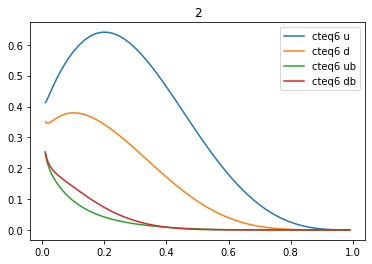

In [43]:
cteq6l1_u = np.array([p_cteq6.xfxQ(2,x,Q) for x in x_axis])
cteq6l1_d = np.array([p_cteq6.xfxQ(1,x,Q) for x in x_axis])
cteq6l1_ub = np.array([p_cteq6.xfxQ(-2,x,Q) for x in x_axis])
cteq6l1_db = np.array([p_cteq6.xfxQ(-1,x,Q) for x in x_axis])
plt.plot(x_axis,cteq6l1_u,label = "cteq6 u")
plt.plot(x_axis,cteq6l1_d,label = "cteq6 d")
plt.plot(x_axis,cteq6l1_ub,label = "cteq6 ub")
plt.plot(x_axis,cteq6l1_db,label = "cteq6 db")
plt.legend()
plt.title(Q)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/ct18qed/ct18qed_0000.dat
ct18qed PDF set, member #0, version 1


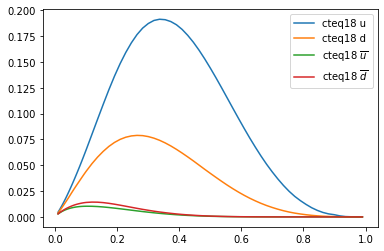

In [44]:
p_cteq18 = lhapdf.mkPDF("ct18qed", 0)
cteq18_d = []
cteq18_u = []
cteq18_dbar = []
cteq18_ubar = []
#x_axis = np.arange(0.01,0.99,0.01)
for x in x_axis:
    cteq18_d.append(p_cteq18.xfxQ(1,x,Q))
    cteq18_u.append(p_cteq18.xfxQ(2,x,Q))
    cteq18_dbar.append(p_cteq18.xfxQ(-1,x,Q))
    cteq18_ubar.append(p_cteq18.xfxQ(-2,x,Q))
plt.plot(x_axis,x_axis*cteq18_u,label = 'cteq18 u')
plt.plot(x_axis,x_axis*cteq18_d,label = 'cteq18 d')
plt.plot(x_axis,x_axis*cteq18_ubar,label = r'cteq18 $\overline{u}$')
plt.plot(x_axis,x_axis*cteq18_dbar,label = r'cteq18 $\overline{d}$')
plt.legend()

Text(0.5, 1.0, '2')

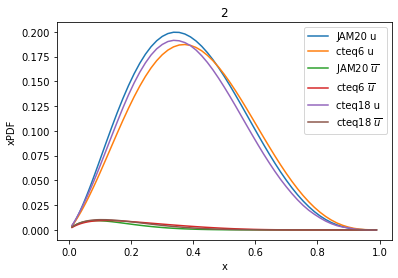

In [45]:
plt.plot(x_axis,x_axis*JAM20PDF_u,label = "JAM20 u")

plt.plot(x_axis,x_axis*cteq6l1_u,label = "cteq6 u")

plt.plot(x_axis,x_axis*JAM20PDF_ub,label = r"JAM20 $\overline{u}$")

plt.plot(x_axis,x_axis*cteq6l1_ub,label = r"cteq6 $\overline{u}$")

plt.plot(x_axis,x_axis*cteq18_u,label = 'cteq18 u')

plt.plot(x_axis,x_axis*cteq18_ubar,label = r'cteq18 $\overline{u}$')

plt.xlabel('x')
plt.ylabel('xPDF')
plt.legend()
plt.title(Q)

Text(0.5, 1.0, '2')

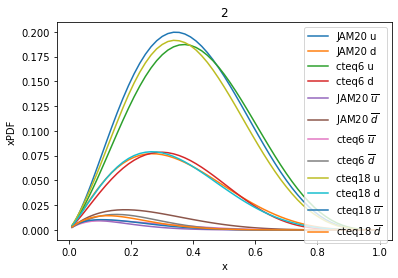

In [46]:
plt.plot(x_axis,x_axis*JAM20PDF_u,label = "JAM20 u")
plt.plot(x_axis,x_axis*JAM20PDF_d,label = "JAM20 d")
plt.plot(x_axis,x_axis*cteq6l1_u,label = "cteq6 u")
plt.plot(x_axis,x_axis*cteq6l1_d,label = "cteq6 d")
plt.plot(x_axis,x_axis*JAM20PDF_ub,label = r"JAM20 $\overline{u}$")
plt.plot(x_axis,x_axis*JAM20PDF_db,label = r"JAM20 $\overline{d}$")
plt.plot(x_axis,x_axis*cteq6l1_ub,label = r"cteq6 $\overline{u}$")
plt.plot(x_axis,x_axis*cteq6l1_db,label = r"cteq6 $\overline{d}$")
plt.plot(x_axis,x_axis*cteq18_u,label = 'cteq18 u')
plt.plot(x_axis,x_axis*cteq18_d,label = 'cteq18 d')
plt.plot(x_axis,x_axis*cteq18_ubar,label = r'cteq18 $\overline{u}$')
plt.plot(x_axis,x_axis*cteq18_dbar,label = r'cteq18 $\overline{d}$')
plt.xlabel('x')
plt.ylabel('xPDF')
plt.legend()
plt.title(Q)

In [47]:
i_before = x_axis[0]
print(i_before)
print(x_axis[1])
sum_u = 0
sum_d = 0
sum_uv = 0
sum_dv = 0
sum_ub = 0
sum_db = 0
for i in x_axis:
    sum_u = sum_u+JAM20PDF.xfxQ(2,i,Q)*(i-i_before)
    sum_d = sum_d+JAM20PDF.xfxQ(1,i,Q)*(i-i_before)
    sum_uv = sum_uv+(JAM20PDF.xfxQ(2,i,Q)-JAM20PDF.xfxQ(-2,i,Q))*(i-i_before)
    sum_dv = sum_dv+(JAM20PDF.xfxQ(1,i,Q)-JAM20PDF.xfxQ(-1,i,Q))*(i-i_before)
    sum_ub = sum_ub+JAM20PDF.xfxQ(-2,i,Q)*(i-i_before)
    sum_db = sum_db+JAM20PDF.xfxQ(-1,i,Q)*(i-i_before)
    i_before = i
print(sum_u,sum_d,sum_u/sum_d)
print(sum_uv,sum_dv,sum_uv/sum_dv)
print(sum_ub,sum_db,sum_ub/sum_db)

0.01
0.010481131341546858
0.32983839168093715 0.1497072600141348 2.203222419873258
0.30814822393452324 0.10414625019318592 2.9588028696465227
0.0216901677464141 0.04556100982094893 0.4760686348185586


In [48]:
i_before = x_axis[0]
print(i_before)
print(x_axis[1])
sum_u = 0
sum_d = 0
sum_uv = 0
sum_dv = 0
sum_ub = 0
sum_db = 0
for i in x_axis:
    sum_u = sum_u+p_cteq18.xfxQ(2,i,Q)*(i-i_before)
    sum_d = sum_d+p_cteq18.xfxQ(1,i,Q)*(i-i_before)
    sum_uv = sum_uv+(p_cteq18.xfxQ(2,i,Q)-p_cteq18.xfxQ(-2,i,Q))*(i-i_before)
    sum_dv = sum_dv+(p_cteq18.xfxQ(1,i,Q)-p_cteq18.xfxQ(-1,i,Q))*(i-i_before)
    sum_ub = sum_ub+p_cteq18.xfxQ(-2,i,Q)*(i-i_before)
    sum_db = sum_db+p_cteq18.xfxQ(-1,i,Q)*(i-i_before)
    i_before = i
print(sum_u,sum_d,sum_u/sum_d)
print(sum_uv,sum_dv,sum_uv/sum_dv)
print(sum_ub,sum_db,sum_ub/sum_db)

0.01
0.010481131341546858
0.3098496317210473 0.14866376556147626 2.084231019918008
0.28493786594546455 0.11701115381023143 2.4351342300886674
0.02491176577558281 0.03165261175124485 0.7870366581867629


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_21535/948078783.py:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x_axis,np.asarray(cteq6l1_u)/np.asarray(cteq6l1_d),label = "cteq6 u/d")
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_21535/948078783.py:9: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_axis,np.asarray(cteq6l1_ub)/np.asarray(cteq6l1_db),label = r"cteq6 $\overline{u}/\overline{d}$")


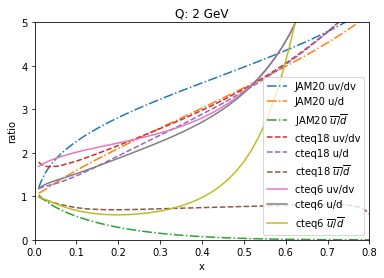

In [49]:
plt.plot(x_axis,(np.asarray(JAM20PDF_u)-np.asarray(JAM20PDF_ub))/(np.asarray(JAM20PDF_d)-np.asarray(JAM20PDF_db)),linestyle = '-.',label = "JAM20 uv/dv")
plt.plot(x_axis,np.asarray(JAM20PDF_u)/np.asarray(JAM20PDF_d),linestyle = '-.',label = "JAM20 u/d")
plt.plot(x_axis,np.asarray(JAM20PDF_ub)/np.asarray(JAM20PDF_db),linestyle = '-.',label = r"JAM20 $\overline{u}/\overline{d}$")
plt.plot(x_axis,(np.asarray(cteq18_u)-np.asarray(cteq18_ubar))/(np.asarray(cteq18_d)-np.asarray(cteq18_dbar)),linestyle = 'dashed',label = "cteq18 uv/dv")
plt.plot(x_axis,np.asarray(cteq18_u)/np.asarray(cteq18_d),linestyle='dashed',label = 'cteq18 u/d')
plt.plot(x_axis,np.asarray(cteq18_ubar)/np.asarray(cteq18_dbar),linestyle='dashed',label = r'cteq18 $\overline{u}/\overline{d}$')
plt.plot(x_axis,(np.asarray(cteq6l1_u)-np.asarray(cteq6l1_ub))/(np.asarray(cteq6l1_d)-np.asarray(cteq6l1_db)),label = "cteq6 uv/dv")
plt.plot(x_axis,np.asarray(cteq6l1_u)/np.asarray(cteq6l1_d),label = "cteq6 u/d")
plt.plot(x_axis,np.asarray(cteq6l1_ub)/np.asarray(cteq6l1_db),label = r"cteq6 $\overline{u}/\overline{d}$")
#plt.plot(x_axis,x_axis*cteq18_dv,label = 'cteq18 d')
#plt.plot(x_axis,cteq18_dbar,label = r'cteq18 $\overline{d}$')
plt.xlabel('x')
plt.ylabel('ratio')
plt.xlim(0,0.8)
plt.ylim(0,5)
plt.legend()
plt.title('Q: '+str(Q)+' GeV')
plt.savefig('ratio_sumrule.pdf')

Text(0.5, 1.0, '2')

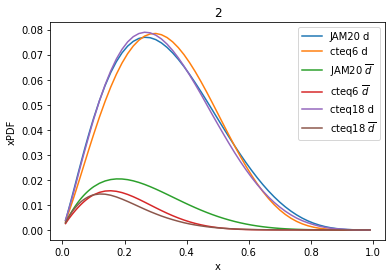

In [50]:

plt.plot(x_axis,x_axis*JAM20PDF_d,label = "JAM20 d")

plt.plot(x_axis,x_axis*cteq6l1_d,label = "cteq6 d")

plt.plot(x_axis,x_axis*JAM20PDF_db,label = r"JAM20 $\overline{d}$")

plt.plot(x_axis,x_axis*cteq6l1_db,label = r"cteq6 $\overline{d}$")

plt.plot(x_axis,x_axis*cteq18_d,label = 'cteq18 d')

plt.plot(x_axis,x_axis*cteq18_dbar,label = r'cteq18 $\overline{d}$')
plt.xlabel('x')
plt.ylabel('xPDF')
plt.legend()
plt.title(Q)

In [51]:
set_pdf_all = lhapdf.getPDFSet("JAM20-SIDIS_PDF_proton_nlo")
p_pdf_all = set_pdf_all.mkPDFs()
print(len(p_pdf_all))

#help(lhapdf)
#p_cteq6_all = lhapdf.mkPDF("cteq6l1")
xuAll = []
for i_set in range(len(p_pdf_all)):
    xuAll.append(p_pdf_all[i_set].xfxQ(2,0.5,10))#Q = 10
print(np.array(xuAll).mean())
print(np.array(xuAll).std())
#print(p_pdf_all)
#print(xuAll)

#xuErr = lhapdf.uncertainty(xuAll,-1)

LHAPDF 6.3.0 loading all 196 PDFs in set JAM20-SIDIS_PDF_proton_nlo
JAM20-SIDIS_PDF_proton_nlo, version 2; 196 PDF members
196
0.1800072956139884
0.004619679039568413


In [52]:
lhapdf.availablePDFSets()

['CT10nlo',
 'CT18qed',
 'JAM18PionPDFnlo',
 'JAM20-SIDIS_FF_pion_nlo',
 'JAM20-SIDIS_PDF_proton_nlo',
 'JAM21PionPDFnlo',
 'MAPFF10NLOPIm',
 'MAPFF10NLOPIp',
 'NNFF10_PIm_lo',
 'NNFF10_PIm_nlo',
 'NNFF10_PIp_lo',
 'NNFF10_PIp_nlo',
 'NNPDF31_nlo_pdfas',
 'NNPDFpol10_100',
 'cteq66',
 'cteq6l1']

LHAPDF 6.3.0 loading all 196 PDFs in set JAM20-SIDIS_PDF_proton_nlo
JAM20-SIDIS_PDF_proton_nlo, version 2; 196 PDF members
LHAPDF 6.3.0 loading all 45 PDFs in set cteq66
cteq66, version 1; 45 PDF members
LHAPDF 6.3.0 loading all 75 PDFs in set CT18qed
CT18qed, version 1; 75 PDF members
LHAPDF 6.3.0 loading all 103 PDFs in set NNPDF31_nlo_pdfas
NNPDF31_nlo_pdfas, version 1; 103 PDF members


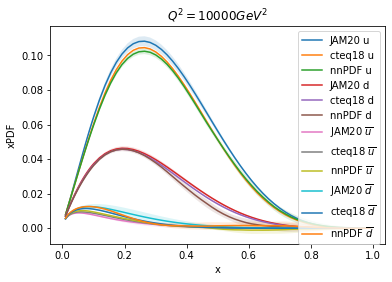

In [53]:
fig, ax = plt.subplots()
Q_plot = math.sqrt(10000)
from uncertainties import ufloat
set_JAM20PDF_all = lhapdf.getPDFSet("JAM20-SIDIS_PDF_proton_nlo")
p_JAM20PDF_all = set_JAM20PDF_all.mkPDFs()
set_cteq66_all = lhapdf.getPDFSet("cteq66")
p_cteq66_all = set_cteq66_all.mkPDFs()
set_cteq18_all = lhapdf.getPDFSet("CT18qed")
p_cteq18_all = set_cteq18_all.mkPDFs()
set_nnPDF_all = lhapdf.getPDFSet("NNPDF31_nlo_pdfas")
p_nnPDF_all = set_nnPDF_all.mkPDFs()
JAM20PDF_u = []
JAM20PDF_uerr = []
cteq6_u = []
cteq6_uerr = []
cteq18_u = []
cteq18_uerr = []
nnPDF_u = []
nnPDF_uerr = []
JAM20PDF_ub = []
JAM20PDF_uberr = []
cteq6_ub = []
cteq6_uberr = []
cteq18_ub = []
cteq18_uberr = []
nnPDF_ub = []
nnPDF_uberr = []
JAM20PDF_d = []
JAM20PDF_derr = []
cteq6_d = []
cteq6_derr = []
cteq18_d = []
cteq18_derr = []
nnPDF_d = []
nnPDF_derr = []
JAM20PDF_db = []
JAM20PDF_dberr = []
cteq6_db = []
cteq6_dberr = []
cteq18_db = []
cteq18_dberr = []
nnPDF_db = []
nnPDF_dberr = []
for xi in x_axis:
    xu_JAM20PDF_All = []
    xub_JAM20PDF_All = []
    xd_JAM20PDF_All = []
    xdb_JAM20PDF_All = []
    for i_set in range(len(p_JAM20PDF_all)):
        xu_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(2,xi,Q_plot))#Q = 10
        xub_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q_plot))#Q = 10
        xd_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(1,xi,Q_plot))#Q = 10
        xdb_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q_plot))#Q = 10
    JAM20PDF_u.append(np.asarray(xu_JAM20PDF_All).mean())
    JAM20PDF_uerr.append(np.asarray(xu_JAM20PDF_All).std())
    JAM20PDF_d.append(np.asarray(xd_JAM20PDF_All).mean())
    JAM20PDF_derr.append(np.asarray(xd_JAM20PDF_All).std())
    JAM20PDF_ub.append(np.asarray(xub_JAM20PDF_All).mean())
    JAM20PDF_uberr.append(np.asarray(xub_JAM20PDF_All).std())
    JAM20PDF_db.append(np.asarray(xdb_JAM20PDF_All).mean())
    JAM20PDF_dberr.append(np.asarray(xdb_JAM20PDF_All).std())
    xu_cteq66_All = []
    xub_cteq66_All = []
    xd_cteq66_All = []
    xdb_cteq66_All = []
    for i_cteq6 in range(len(p_cteq66_all)):
        xu_cteq66_All.append(p_cteq66_all[i_cteq6].xfxQ(2,xi,Q_plot))#Q = 10
        xub_cteq66_All.append(p_cteq66_all[i_cteq6].xfxQ(-2,xi,Q_plot))#Q = 10
        xd_cteq66_All.append(p_cteq66_all[i_cteq6].xfxQ(1,xi,Q_plot))#Q = 10
        xdb_cteq66_All.append(p_cteq66_all[i_cteq6].xfxQ(-1,xi,Q_plot))#Q = 10
    cteq6_u.append(np.asarray(xu_cteq66_All).mean())
    cteq6_uerr.append(np.asarray(xu_cteq66_All).std())
    cteq6_ub.append(np.asarray(xub_cteq66_All).mean())
    cteq6_uberr.append(np.asarray(xub_cteq66_All).std())
    cteq6_d.append(np.asarray(xd_cteq66_All).mean())
    cteq6_derr.append(np.asarray(xd_cteq66_All).std())
    cteq6_db.append(np.asarray(xdb_cteq66_All).mean())
    cteq6_dberr.append(np.asarray(xdb_cteq66_All).std())
    xu_cteq18_All = []
    xub_cteq18_All = []
    xd_cteq18_All = []
    xdb_cteq18_All = []
    for i_cteq18 in range(len(p_cteq18_all)):
        xu_cteq18_All.append(p_cteq18_all[i_cteq18].xfxQ(2,xi,Q_plot))#Q = 10
        xub_cteq18_All.append(p_cteq18_all[i_cteq18].xfxQ(-2,xi,Q_plot))#Q = 10
        xd_cteq18_All.append(p_cteq18_all[i_cteq18].xfxQ(1,xi,Q_plot))#Q = 10
        xdb_cteq18_All.append(p_cteq18_all[i_cteq18].xfxQ(-1,xi,Q_plot))#Q = 10
    cteq18_u.append(np.asarray(xu_cteq18_All).mean())
    cteq18_uerr.append(np.asarray(xu_cteq18_All).std())
    cteq18_ub.append(np.asarray(xub_cteq18_All).mean())
    cteq18_uberr.append(np.asarray(xub_cteq18_All).std())
    cteq18_d.append(np.asarray(xd_cteq18_All).mean())
    cteq18_derr.append(np.asarray(xd_cteq18_All).std())
    cteq18_db.append(np.asarray(xdb_cteq18_All).mean())
    cteq18_dberr.append(np.asarray(xdb_cteq18_All).std())
    xu_nnPDF_All = []
    xub_nnPDF_All = []
    xd_nnPDF_All = []
    xdb_nnPDF_All = []
    for i_nnPDF in range(len(p_nnPDF_all)):
        xu_nnPDF_All.append(p_nnPDF_all[i_nnPDF].xfxQ(2,xi,Q_plot))#Q = 10
        xub_nnPDF_All.append(p_nnPDF_all[i_nnPDF].xfxQ(-2,xi,Q_plot))#Q = 10
        xd_nnPDF_All.append(p_nnPDF_all[i_nnPDF].xfxQ(1,xi,Q_plot))#Q = 10
        xdb_nnPDF_All.append(p_nnPDF_all[i_nnPDF].xfxQ(-1,xi,Q_plot))#Q = 10
    nnPDF_u.append(np.asarray(xu_nnPDF_All).mean())
    nnPDF_uerr.append(np.asarray(xu_nnPDF_All).std())
    nnPDF_ub.append(np.asarray(xub_nnPDF_All).mean())
    nnPDF_uberr.append(np.asarray(xub_nnPDF_All).std())
    nnPDF_d.append(np.asarray(xd_nnPDF_All).mean())
    nnPDF_derr.append(np.asarray(xd_nnPDF_All).std())
    nnPDF_db.append(np.asarray(xdb_nnPDF_All).mean())
    nnPDF_dberr.append(np.asarray(xdb_nnPDF_All).std())
plt.plot(x_axis,x_axis*np.asarray(JAM20PDF_u),label = 'JAM20 u')
plt.fill_between(x_axis,x_axis*np.asarray(JAM20PDF_u)-x_axis*np.asarray(JAM20PDF_uerr),x_axis*np.asarray(JAM20PDF_u)+x_axis*np.asarray(JAM20PDF_uerr),alpha = 0.15)
#plt.plot(x_axis,x_axis*np.asarray(cteq6_u),label = 'cteq6 u')
#plt.fill_between(x_axis,x_axis*np.asarray(cteq6_u)-x_axis*np.asarray(cteq6_uerr),x_axis*np.asarray(cteq6_u)+x_axis*np.asarray(cteq6_uerr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(cteq18_u),label = 'cteq18 u')
plt.fill_between(x_axis,x_axis*np.asarray(cteq18_u)-x_axis*np.asarray(cteq18_uerr),x_axis*np.asarray(cteq18_u)+x_axis*np.asarray(cteq18_uerr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(nnPDF_u),label = 'nnPDF u')
plt.fill_between(x_axis,x_axis*np.asarray(nnPDF_u)-x_axis*np.asarray(nnPDF_uerr),x_axis*np.asarray(nnPDF_u)+x_axis*np.asarray(nnPDF_uerr),alpha = 0.15)

plt.plot(x_axis,x_axis*np.asarray(JAM20PDF_d),label = 'JAM20 d')
plt.fill_between(x_axis,x_axis*np.asarray(JAM20PDF_d)-x_axis*np.asarray(JAM20PDF_derr),x_axis*np.asarray(JAM20PDF_d)+x_axis*np.asarray(JAM20PDF_derr),alpha = 0.15)
#plt.plot(x_axis,x_axis*np.asarray(cteq6_d),label = 'cteq6 d')
#plt.fill_between(x_axis,x_axis*np.asarray(cteq6_d)-x_axis*np.asarray(cteq6_derr),x_axis*np.asarray(cteq6_d)+x_axis*np.asarray(cteq6_derr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(cteq18_d),label = 'cteq18 d')
plt.fill_between(x_axis,x_axis*np.asarray(cteq18_d)-x_axis*np.asarray(cteq18_derr),x_axis*np.asarray(cteq18_d)+x_axis*np.asarray(cteq18_derr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(nnPDF_d),label = 'nnPDF d')
plt.fill_between(x_axis,x_axis*np.asarray(nnPDF_d)-x_axis*np.asarray(nnPDF_derr),x_axis*np.asarray(nnPDF_d)+x_axis*np.asarray(nnPDF_derr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(JAM20PDF_ub),label = r'JAM20 $\overline{u}$')
plt.fill_between(x_axis,x_axis*np.asarray(JAM20PDF_ub)-x_axis*np.asarray(JAM20PDF_uberr),x_axis*np.asarray(JAM20PDF_ub)+x_axis*np.asarray(JAM20PDF_uberr),alpha = 0.15)
#plt.plot(x_axis,x_axis*np.asarray(cteq6_ub),label = r'cteq6 $\overline{d}$')
#plt.fill_between(x_axis,x_axis*np.asarray(cteq6_ub)-x_axis*np.asarray(cteq6_uberr),x_axis*np.asarray(cteq6_ub)+x_axis*np.asarray(cteq6_uberr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(cteq18_ub),label = r'cteq18 $\overline{u}$')
plt.fill_between(x_axis,x_axis*np.asarray(cteq18_ub)-x_axis*np.asarray(cteq18_uberr),x_axis*np.asarray(cteq18_ub)+x_axis*np.asarray(cteq18_uberr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(nnPDF_ub),label = r'nnPDF $\overline{u}$')
plt.fill_between(x_axis,x_axis*np.asarray(nnPDF_ub)-x_axis*np.asarray(nnPDF_uberr),x_axis*np.asarray(nnPDF_ub)+x_axis*np.asarray(nnPDF_uberr),alpha = 0.15)

plt.plot(x_axis,x_axis*np.asarray(JAM20PDF_db),label = r'JAM20 $\overline{d}$')
plt.fill_between(x_axis,x_axis*np.asarray(JAM20PDF_db)-x_axis*np.asarray(JAM20PDF_dberr),x_axis*np.asarray(JAM20PDF_db)+x_axis*np.asarray(JAM20PDF_dberr),alpha = 0.15)
#plt.plot(x_axis,x_axis*np.asarray(cteq6_db),label = r'cteq6 $\overline{d}$')
#plt.fill_between(x_axis,x_axis*np.asarray(cteq6_db)-x_axis*np.asarray(cteq6_dberr),x_axis*np.asarray(cteq6_db)+x_axis*np.asarray(cteq6_dberr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(cteq18_db),label = r'cteq18 $\overline{d}$')
plt.fill_between(x_axis,x_axis*np.asarray(cteq18_db)-x_axis*np.asarray(cteq18_dberr),x_axis*np.asarray(cteq18_db)+x_axis*np.asarray(cteq18_dberr),alpha = 0.15)
plt.plot(x_axis,x_axis*np.asarray(nnPDF_db),label = r'nnPDF $\overline{d}$')
plt.fill_between(x_axis,x_axis*np.asarray(nnPDF_db)-x_axis*np.asarray(nnPDF_dberr),x_axis*np.asarray(nnPDF_db)+x_axis*np.asarray(nnPDF_dberr),alpha = 0.15)


plt.legend()
plt.xlabel("x")
plt.ylabel("xPDF")
plt.title(r'$Q^2 = 10000 GeV^2$')
plt.savefig('/Users/shuojia/CSV/notebook/notebook_results/PDFs_high.pdf')
#ax.set_yscale("log")

LHAPDF 6.3.0 loading all 196 PDFs in set JAM20-SIDIS_PDF_proton_nlo
JAM20-SIDIS_PDF_proton_nlo, version 2; 196 PDF members


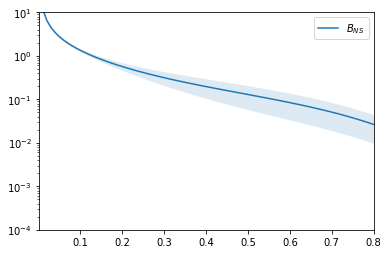

In [54]:
set_JAM20PDF_all = lhapdf.getPDFSet("JAM20-SIDIS_PDF_proton_nlo")
#set_JAM20PDF_all = lhapdf.getPDFSet("CT18qed")
p_JAM20PDF_all = set_JAM20PDF_all.mkPDFs()
from uncertainties import ufloat

x_axis = np.arange(0.01,0.99,0.01)

Q = math.sqrt(4.6)
fig = plt.figure()
ax = fig.add_subplot()

R_sea_NS_n = []
R_sea_NS_s = []
for xi in x_axis:
    xu_JAM20PDF_All = []
    xub_JAM20PDF_All = []
    xd_JAM20PDF_All = []
    xdb_JAM20PDF_All = []
    for i_set in range(len(p_JAM20PDF_all)):
        xu_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(2,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q))#Q = 2
        xub_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q))#Q = 2
        xd_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(1,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q))#Q = 2
        xdb_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q))#Q = 2
    #print(np.asarray(xu_JAM20PDF_All).mean())
    #print(np.asarray(xu_JAM20PDF_All).std())
    u = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
    d = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
    ub = ufloat(np.asarray(xub_JAM20PDF_All).mean(),np.asarray(xub_JAM20PDF_All).std())
    db = ufloat(np.asarray(xdb_JAM20PDF_All).mean(),np.asarray(xdb_JAM20PDF_All).std())
    #print(u)
    R_sea_NS_n.append((5*(ub+db)/(u+d)).n)
    R_sea_NS_s.append((5*(ub+db)/(u+d)).s)

plt.plot(x_axis,np.asarray(R_sea_NS_n),label=r"$B_{NS}$")
plt.fill_between(x_axis,np.asarray(R_sea_NS_n)+np.asarray(R_sea_NS_s),np.asarray(R_sea_NS_n)-np.asarray(R_sea_NS_s),alpha = 0.15)
ax.set_yscale("log")
plt.ylim(1e-4,1e1)
plt.xlim(0.001,0.8)
plt.legend()

LHAPDF 6.3.0 loading all 196 PDFs in set JAM20-SIDIS_FF_pion_nlo
196
JAM20-SIDIS_FF_pion_nlo, version 2; 196 PDF members


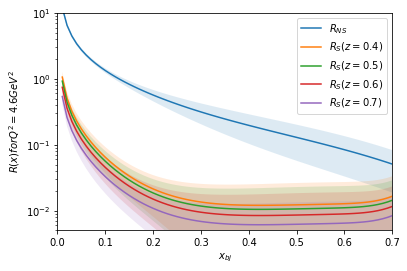

In [55]:
#Q = 2
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis,np.asarray(R_sea_NS_n),label=r"$R_{NS}$")
plt.fill_between(x_axis,np.asarray(R_sea_NS_n)+np.asarray(R_sea_NS_s),np.asarray(R_sea_NS_n)-np.asarray(R_sea_NS_s),alpha = 0.15)


set_JAM20_FF = lhapdf.getPDFSet("JAM20-SIDIS_FF_pion_nlo")
JAM20_FF = set_JAM20_FF.mkPDFs()
print(len(JAM20_FF))
zs = [0.4,0.5,0.6,0.7]
for zi in zs:
    duplus = []
    duminus = []
    dsplus = []
    dsminus = []
    for i_FFset in range(len(JAM20_FF)):
        duplus.append(JAM20_FF[i_FFset].xfxQ(2,zi,Q))
        duminus.append(JAM20_FF[i_FFset].xfxQ(-2,zi,Q))
        dsplus.append(JAM20_FF[i_FFset].xfxQ(3,zi,Q))
        dsminus.append(JAM20_FF[i_FFset].xfxQ(-3,zi,Q))
    Dup = ufloat(np.asarray(duplus).mean(),np.asarray(duplus).std())
    Dum = ufloat(np.asarray(duminus).mean(),np.asarray(duminus).std())    
    Dsp = ufloat(np.asarray(dsplus).mean(),np.asarray(dsplus).std())
    Dsm = ufloat(np.asarray(dsminus).mean(),np.asarray(dsminus).std())    
    rsea_s_d = (Dsp+Dsm)/Dup/(1+Dum/Dup)
    #r_sea_s_d_err = ((Dsp+Dsm)/Dup/(1+Dum/Dup)).s
    #rsea_s_d = (dsplus+dsminus)/duplus/(1+duminus/duplus)
    R_sea_strange_n = []
    R_sea_strange_err = []
    for xi in x_axis:
        xu_JAM20PDF_All = []
        xd_JAM20PDF_All = []
        xs_JAM20PDF_All = []
        xsb_JAM20PDF_All = []
        for i_PDFset in range(len(p_JAM20PDF_all)):
            xu_JAM20PDF_All.append(p_JAM20PDF_all[i_PDFset].xfxQ(2,xi,Q)-p_JAM20PDF_all[i_PDFset].xfxQ(-2,xi,Q))
            xd_JAM20PDF_All.append(p_JAM20PDF_all[i_PDFset].xfxQ(1,xi,Q)-p_JAM20PDF_all[i_PDFset].xfxQ(-1,xi,Q))
            xs_JAM20PDF_All.append(p_JAM20PDF_all[i_PDFset].xfxQ(3,xi,Q))
            xsb_JAM20PDF_All.append(p_JAM20PDF_all[i_PDFset].xfxQ(-3,xi,Q))
   
        u = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
        d = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
        s = ufloat(np.asarray(xs_JAM20PDF_All).mean(),np.asarray(xs_JAM20PDF_All).std())
        sb = ufloat(np.asarray(xsb_JAM20PDF_All).mean(),np.asarray(xsb_JAM20PDF_All).std())
        rsea_s = rsea_s_d*(s+sb)/(u+d)
        #rsea_s = rsea_s_d*(y_s+y_sbar)/(y_d+y_u)
        R_sea_strange_n.append(rsea_s.n)
        R_sea_strange_err.append(rsea_s.s)
    plt.plot(x_axis,np.asarray(R_sea_strange_n),label=f"$R_{{S}}(z = {zi})$")
    plt.fill_between(x_axis,np.asarray(R_sea_strange_n)-np.asarray(R_sea_strange_err),np.asarray(R_sea_strange_n)+np.asarray(R_sea_strange_err),alpha = 0.15)
ax.set_yscale("log")
plt.xlim(0,0.7)
plt.ylim(5e-3,1e1)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$R(x) for Q^2 = 4.6 GeV^2$")
plt.legend()
#plt.xlim(0.3,0.8)
plt.savefig('/Users/shuojia/CSV/notebook/notebook_results/Bterm_JAM20PDF_FF.pdf')

196LHAPDF 6.3.0 loading all 196 PDFs in set JAM20-SIDIS_FF_pion_nlo

JAM20-SIDIS_FF_pion_nlo, version 2; 196 PDF members


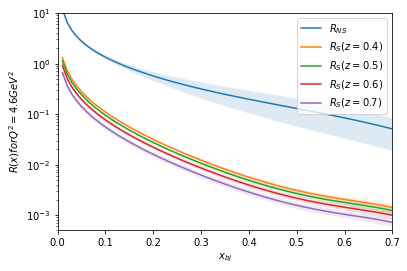

In [56]:
Q = math.sqrt(4.6)
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis,np.asarray(R_sea_NS_n),label=r"$R_{NS}$")
plt.fill_between(x_axis,np.asarray(R_sea_NS_n)+np.asarray(R_sea_NS_s),np.asarray(R_sea_NS_n)-np.asarray(R_sea_NS_s),alpha = 0.15)


set_JAM20_FF = lhapdf.getPDFSet("JAM20-SIDIS_FF_pion_nlo")
JAM20_FF = set_JAM20_FF.mkPDFs()
print(len(JAM20_FF))
zs = [0.4,0.5,0.6,0.7]
for zi in zs:
    duplus = []
    duminus = []
    dsplus = []
    dsminus = []
    for i_FFset in range(len(JAM20_FF)):
        duplus.append(JAM20_FF[i_FFset].xfxQ(2,zi,Q))
        duminus.append(JAM20_FF[i_FFset].xfxQ(-2,zi,Q))
        dsplus.append(JAM20_FF[i_FFset].xfxQ(3,zi,Q))
        dsminus.append(JAM20_FF[i_FFset].xfxQ(-3,zi,Q))
    Dup = ufloat(np.asarray(duplus).mean(),np.asarray(duplus).std())
    Dum = ufloat(np.asarray(duminus).mean(),np.asarray(duminus).std())    
    Dsp = ufloat(np.asarray(dsplus).mean(),np.asarray(dsplus).std())
    Dsm = ufloat(np.asarray(dsminus).mean(),np.asarray(dsminus).std())    
    rsea_s_d = (Dsp+Dsm)/Dup/(1+Dum/Dup)
    #r_sea_s_d_err = ((Dsp+Dsm)/Dup/(1+Dum/Dup)).s
    #rsea_s_d = (dsplus+dsminus)/duplus/(1+duminus/duplus)
    R_sea_strange_n = []
    R_sea_strange_err = []
    for xi in x_axis:
        xu_JAM20PDF_All = []
        xd_JAM20PDF_All = []
        xs_JAM20PDF_All = []
        xsb_JAM20PDF_All = []
        for i_PDFset in range(len(p_cteq66_all)):
            xu_JAM20PDF_All.append(p_cteq66_all[i_PDFset].xfxQ(2,xi,Q)-p_cteq66_all[i_PDFset].xfxQ(-2,xi,Q))
            xd_JAM20PDF_All.append(p_cteq66_all[i_PDFset].xfxQ(1,xi,Q)-p_cteq66_all[i_PDFset].xfxQ(-1,xi,Q))
            xs_JAM20PDF_All.append(p_cteq66_all[i_PDFset].xfxQ(3,xi,Q))
            xsb_JAM20PDF_All.append(p_cteq66_all[i_PDFset].xfxQ(-3,xi,Q))
   
        u = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
        d = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
        s = ufloat(np.asarray(xs_JAM20PDF_All).mean(),np.asarray(xs_JAM20PDF_All).std())
        sb = ufloat(np.asarray(xsb_JAM20PDF_All).mean(),np.asarray(xsb_JAM20PDF_All).std())
        rsea_s = rsea_s_d*(s+sb)/(u+d)
        #rsea_s = rsea_s_d*(y_s+y_sbar)/(y_d+y_u)
        R_sea_strange_n.append(rsea_s.n)
        R_sea_strange_err.append(rsea_s.s)
    plt.plot(x_axis,np.asarray(R_sea_strange_n),label=f"$R_{{S}}(z = {zi})$")
    plt.fill_between(x_axis,np.asarray(R_sea_strange_n)-np.asarray(R_sea_strange_err),np.asarray(R_sea_strange_n)+np.asarray(R_sea_strange_err),alpha = 0.15)
ax.set_yscale("log")
plt.xlim(0,0.7)
plt.ylim(5e-4,1e1)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$R(x) for Q^2 = 4.6 GeV^2$")
plt.legend()
#plt.xlim(0.3,0.8)
plt.savefig('/Users/shuojia/CSV/notebook/notebook_results/Bterm_cteq66PDF_JAM20FF.pdf')

LHAPDF 6.3.0 loading all 196 PDFs in set JAM20-SIDIS_PDF_proton_nlo
JAM20-SIDIS_PDF_proton_nlo, version 2; 196 PDF members
LHAPDF 6.3.0 loading all 75 PDFs in set CT18qed
CT18qed, version 1; 75 PDF members
LHAPDF 6.3.0 loading all 45 PDFs in set cteq66
cteq66, version 1; 45 PDF members
LHAPDF 6.3.0 loading all 103 PDFs in set NNPDF31_nlo_pdfas
NNPDF31_nlo_pdfas, version 1; 103 PDF members


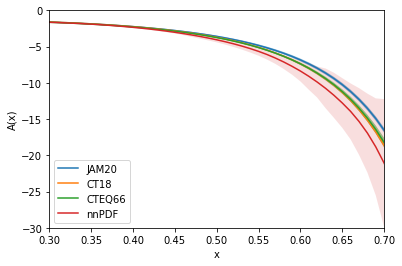

In [57]:
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
set_JAM20PDF_all = lhapdf.getPDFSet("JAM20-SIDIS_PDF_proton_nlo")
#set_JAM20PDF_all = lhapdf.getPDFSet("cteq66")
p_JAM20PDF_all = set_JAM20PDF_all.mkPDFs()

from uncertainties import ufloat

x_axis = np.arange(0.3,0.8,0.01)

Q = math.sqrt(4.6)
fig = plt.figure()
ax = fig.add_subplot()

Ax_n = []
Ax_err = []

for xi in x_axis:
    xu_JAM20PDF_All = []
    xd_JAM20PDF_All = []
    
    for i_set in range(len(p_JAM20PDF_all)):
        xu_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(2,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q))#Q = 2
        xd_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(1,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q))#Q = 2
    uv = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
    dv = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
    Ax_n.append((-4/(3*(uv+dv))).n)
    Ax_err.append((-4/(3*(uv+dv))).s)
    
plt.plot(x_axis,np.asarray(Ax_n),label=r"JAM20")
plt.fill_between(x_axis,np.asarray(Ax_n)+np.asarray(Ax_err),np.asarray(Ax_n)-np.asarray(Ax_err),alpha = 0.5)

#set_JAM20PDF_all = lhapdf.getPDFSet("JAM20-SIDIS_PDF_proton_nlo")
set_JAM20PDF_all = lhapdf.getPDFSet("CT18qed")
p_JAM20PDF_all = set_JAM20PDF_all.mkPDFs()


Ax_n = []
Ax_err = []

for xi in x_axis:
    xu_JAM20PDF_All = []
    xd_JAM20PDF_All = []
    
    for i_set in range(len(p_JAM20PDF_all)):
        xu_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(2,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q))#Q = 2
        xd_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(1,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q))#Q = 2
    uv = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
    dv = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
    Ax_n.append((-4/(3*(uv+dv))).n)
    Ax_err.append((-4/(3*(uv+dv))).s)
    
plt.plot(x_axis,np.asarray(Ax_n),label=r"CT18")
plt.fill_between(x_axis,np.asarray(Ax_n)+np.asarray(Ax_err),np.asarray(Ax_n)-np.asarray(Ax_err),alpha = 0.5)

set_JAM20PDF_all = lhapdf.getPDFSet("cteq66")
p_JAM20PDF_all = set_JAM20PDF_all.mkPDFs()


Ax_n = []
Ax_err = []

for xi in x_axis:
    xu_JAM20PDF_All = []
    xd_JAM20PDF_All = []
    
    for i_set in range(len(p_JAM20PDF_all)):
        xu_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(2,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q))#Q = 2
        xd_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(1,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q))#Q = 2
    uv = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
    dv = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
    Ax_n.append((-4/(3*(uv+dv))).n)
    Ax_err.append((-4/(3*(uv+dv))).s)
    
plt.plot(x_axis,np.asarray(Ax_n),label=r"CTEQ66")
plt.fill_between(x_axis,np.asarray(Ax_n)+np.asarray(Ax_err),np.asarray(Ax_n)-np.asarray(Ax_err),alpha = 0.5)

set_JAM20PDF_all = lhapdf.getPDFSet("NNPDF31_nlo_pdfas")
p_JAM20PDF_all = set_JAM20PDF_all.mkPDFs()


Ax_n = []
Ax_err = []

for xi in x_axis:
    xu_JAM20PDF_All = []
    xd_JAM20PDF_All = []
    
    for i_set in range(len(p_JAM20PDF_all)):
        xu_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(2,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-2,xi,Q))#Q = 2
        xd_JAM20PDF_All.append(p_JAM20PDF_all[i_set].xfxQ(1,xi,Q)-p_JAM20PDF_all[i_set].xfxQ(-1,xi,Q))#Q = 2
    uv = ufloat(np.asarray(xu_JAM20PDF_All).mean(),np.asarray(xu_JAM20PDF_All).std())
    dv = ufloat(np.asarray(xd_JAM20PDF_All).mean(),np.asarray(xd_JAM20PDF_All).std())
    Ax_n.append((-4/(3*(uv+dv))).n)
    Ax_err.append((-4/(3*(uv+dv))).s)
    
plt.plot(x_axis,np.asarray(Ax_n),label=r"nnPDF")
plt.fill_between(x_axis,np.asarray(Ax_n)+np.asarray(Ax_err),np.asarray(Ax_n)-np.asarray(Ax_err),alpha = 0.15)



plt.ylim(-30,0)
plt.xlim(0.3,0.7)
#ax.set_yscale("log")
#plt.ylim(1e-4,1e1)
#plt.xlim(0.001,0.8)
plt.xlabel('x')
plt.ylabel('A(x)')
plt.legend()
plt.savefig("/Users/shuojia/CSV/notebook/notebook_results/Ax.pdf")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_21535/3014397017.py:2: RuntimeWarning: divide by zero encountered in power
  return (1-x)**params[0]*x**params[1]*(x-params[2])


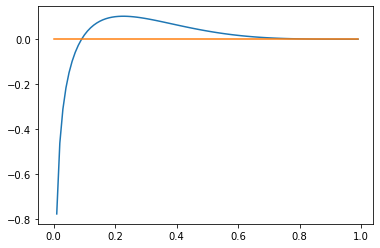

In [58]:
def delta_udv(x,params):
    return (1-x)**params[0]*x**params[1]*(x-params[2])
    #return params[3]*(1-x)**params[0]*x**params[1]*(x-params[2])
    #return params[2]*(1-x)**params[0]*x**params[1]
x_axis = np.arange(0,1,0.01)
arguments = (4,-0.5,0.0909,0.2)
#arguments = (1,0.5,0.2)
y_delta_uv = delta_udv(x_axis,arguments)
plt.plot(x_axis,y_delta_uv,label = 'uv')

plt.plot(x_axis,0*x_axis)
#plt.ylim(-0.05,0.05)


In [59]:
def delta_udv(x,a,b,c,d):
    return d*(1-x)**a*x**b*(x-c)
import scipy.integrate as integrate
#print(integrate.quad(delta_udv,0,1,(4,0.5,0.0909,0.2)))
a = 4
b = -0.5
c = 0.0909
d = 0.4
p_inter = abs(integrate.quad(delta_udv,0,1,(a,b,0.01,d))[0])
p_k = 0.01
for k in np.arange(0.01,1,0.0001):
    #if abs(integrate.quad(delta_udv,0,1,(4,0.5,k,0.2))[0])<0.0002:
    #    print(k)
    #    print(integrate.quad(delta_udv,0,1,(4,0.5,k,0.2))[0])
    if abs(integrate.quad(delta_udv,0,1,(a,b,k,d))[0])>p_inter:
        print(p_k)
        print(integrate.quad(delta_udv,0,1,(a,b,p_k,d))[0])
        break
    p_inter = abs(integrate.quad(delta_udv,0,1,(a,b,k,d))[0])
    p_k = k
    #plt.plot(k,integrate.quad(delta_udv,0,1,(4,-0.5,k,0.2))[0],'bo')
    #plt.plot(k,0*k,'mo')

0.09089999999999951
2.955266932197304e-06


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_21535/1994076592.py:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  if abs(integrate.quad(delta_udv,0,1,(a,b,k,d))[0])>p_inter:
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_21535/1994076592.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  p_inter = abs(integrate.quad(delta_udv,0,1,(a,b,k,d))[0])


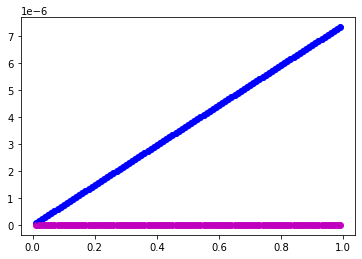

In [60]:
def delta_udv(x,a,b,c,d):
    return d*(1-x)**a*x**b*(x-c)
import scipy.integrate as integrate
#print(integrate.quad(delta_udv,0,1,(4,0.5,0.0909,0.2)))
a = 4
b = -0.5
c = 0.0909
d = 0.2

for k in np.arange(0.01,1,0.01):
    plt.plot(k,integrate.quad(delta_udv,0,1,(a,b,c,k))[0],'bo')
    plt.plot(k,0*k,'mo')

In [61]:
print(integrate.quad(delta_udv,0,1,(4,0.5,0.0909,1)))

(0.01033377289378247, 3.2631103721869614e-10)


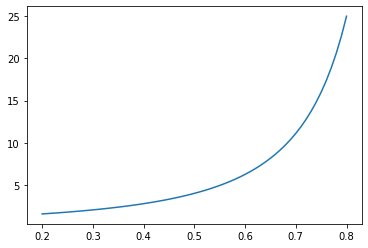

In [62]:
x = np.arange(0.2,0.8,0.01)
y = (1-x)**-2
plt.plot(x,y)